In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the dataset, specifying the correct separator
data = pd.read_csv('/content/household_power_consumption.txt', sep='\t', low_memory=False, na_values=['nan','?']) # Changed separator to '\t'

# Print the first few rows to check column names and data types
print(data.head())
print(data.dtypes)  # Check data types of each column

# Assuming your date and time columns are named 'Date' and 'Time'
# If not, replace with the actual column names from the printed output
# Ensure that 'Date' and 'Time' are in the correct format for conversion

# Fix the 'Date' column by extracting the first 10 characters (assuming 'dd/mm/yy' format)
data['Date'] = data['Date'].str[:10]

data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')

# Handle missing values (including failed datetime conversions)
data.replace('?', np.nan, inplace=True)
data = data.dropna()  # Drop rows with any missing values

# Convert columns to appropriate data types
# Check if these columns actually exist in your dataset after printing data.head()
# Use errors='coerce' to handle potential non-numeric values during conversion
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')

# Drop any remaining rows with missing values after numeric conversion
data = data.dropna()

# Set Datetime as the index
data.set_index('Datetime', inplace=True)
#

       Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16-12-06  17:24:00                4.216                  0.418   234.84   
1  16-12-06  17:25:00                5.360                  0.436   233.63   
2  16-12-06  17:26:00                5.374                  0.498   233.29   
3  16-12-06  17:27:00                5.388                  0.502   233.74   
4  16-12-06  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
Date                      object
Time                      object
Global_active_power      float64
Global_react

<ipython-input-15-b7eab33f855f>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')
<ipython-input-15-b7eab33f855f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
<ipython-input-15-b7eab33f855f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

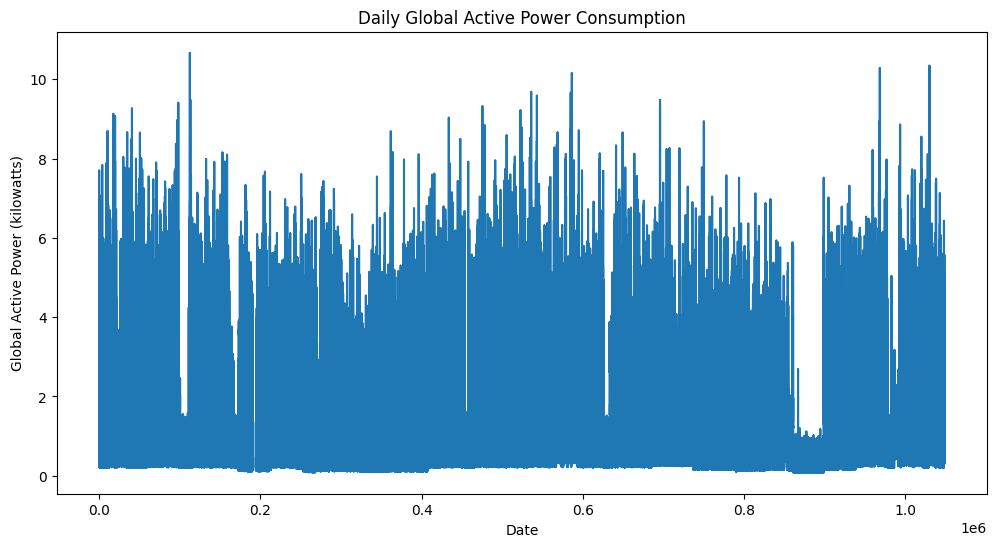

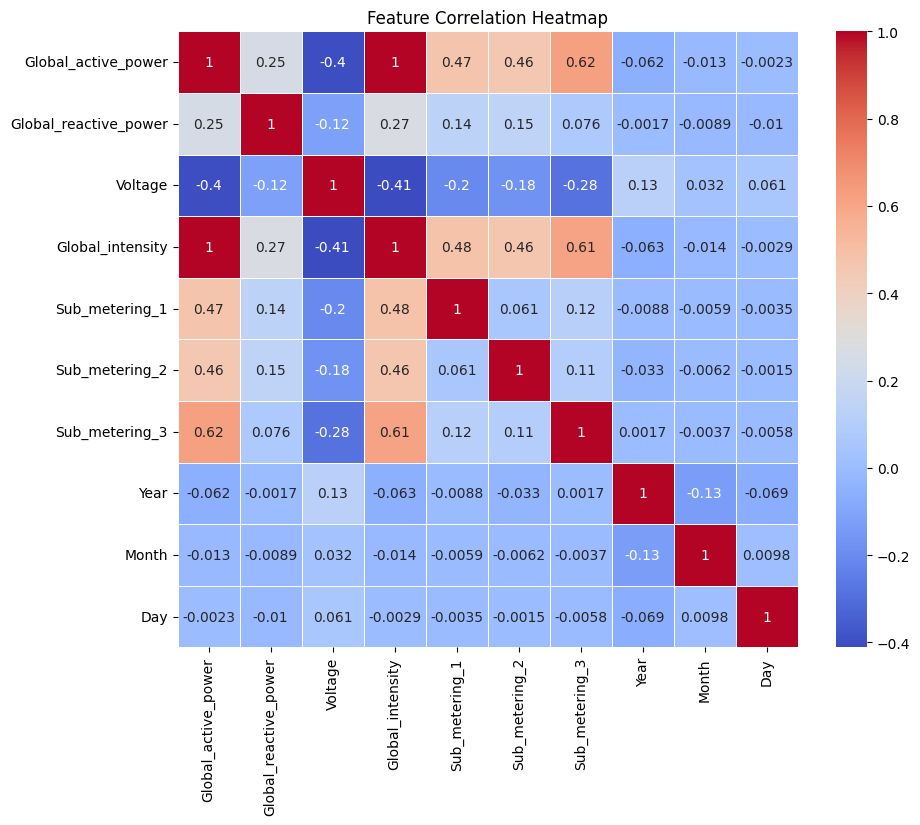

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset, specifying the correct separator
data = pd.read_csv('/content/household_power_consumption.txt', sep='\t', low_memory=False, na_values=['nan','?']) # Changed separator to '\t'

# ... (Your existing data cleaning and processing code) ...

# Convert 'Date' column to datetime objects and extract relevant features
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%y') # Changed format to '%d-%m-%y'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop the original 'Date' column as it's no longer needed
data = data.drop('Date', axis=1)

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Visualize global active power consumption
plt.figure(figsize=(12, 6))
plt.plot(data['Global_active_power']) # Changed 'daily_data' to 'data'
plt.title('Daily Global Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

# Heatmap to show correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5) # Use numeric_data for correlation
plt.title('Feature Correlation Heatmap')
plt.show()

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:              1048575
Model:                  ARIMA(5, 1, 0)   Log Likelihood             -163119.855
Date:                 Sun, 07 Jul 2024   AIC                         326251.709
Time:                         20:03:02   BIC                         326322.887
Sample:                              0   HQIC                        326271.260
                             - 1048575                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0073      0.000     19.791      0.000       0.007       0.008
ar.L2         -0.1375      0.000   -360.497      0.000      -0.138      -0.137
ar.L3         -0.1302      0.000   -357.687 

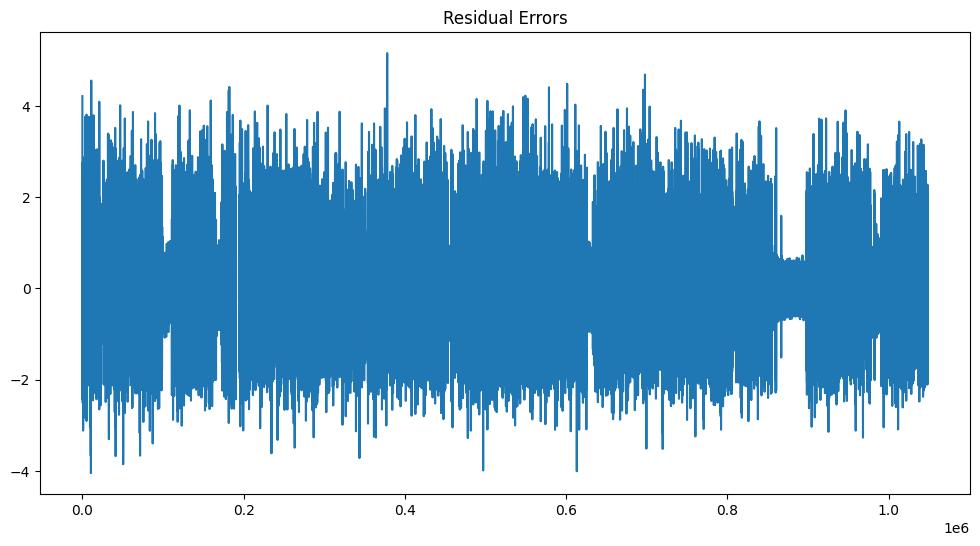

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # Import the correct ARIMA class

# Assuming 'data' is the DataFrame containing 'Global_active_power'
model = ARIMA(data['Global_active_power'], order=(5,1,0))  # Use 'data' instead of 'daily_data'

# Fit the model
model_fit = model.fit() # disp argument is no longer required

# Summary of the model
print(model_fit.summary())

# Plot the residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residual Errors')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
# Use 'data' instead of 'daily_data'
scaled_data = scaler.fit_transform(data['Global_active_power'].values.reshape(-1,1))

# Prepare data for LSTM
train_size = int(len(scaled_data) * 0.80)
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

Epoch 1/100
838858/838858 - 2395s - loss: nan - 2395s/epoch - 3ms/step
Epoch 2/100


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# ... (Your existing data cleaning and processing code) ...

# Data scaling
# ... (Your existing data scaling code) ...

# Prepare data for LSTM
# ... (Your existing LSTM data preparation code) ...

# LSTM model
# ... (Your existing LSTM model definition and training code) ...

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
# ... (Your existing prediction inversion code) ...

# Calculate RMSE
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

6554/6554 [==============================] - 15s 2ms/step


TypeError: Singleton array 0.49877289031527283 cannot be considered a valid collection.

In [ ]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Load your data here, ensuring correct separator and handling missing values
# Use ';' as the separator
data = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 # Remove parse_dates and index_col since 'Date' and 'Time' might not exist
                 infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'])

# Check if 'Date' and 'Time' columns exist and create 'dt' if needed
if 'Date' in data.columns and 'Time' in data.columns:
    data['dt'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data = data.set_index('dt')
else:
    print("Warning: 'Date' and/or 'Time' columns not found. Proceeding without datetime index.")

# Verify the column names in your DataFrame and check for 'Global_active_power'
print(data.columns)

# Initialize correct_column_name to None
correct_column_name = None # Initialize the variable here

# If 'Global_active_power' is not found, check for possible variations or typos
if 'Global_active_power' not in data.columns:
    # Try variations of the column name, including a possible typo
    possible_names = ['Global_active_power', 'global_active_power', 'GlobalActivePower', 'Global_Active_Power', 'Global_active_power_']
    for name in possible_names:
        if name in data.columns:
            data.rename(columns={name: 'Global_active_power'}, inplace=True)
            print(f"Found column '{name}'. Using this for ARIMA model.")
            correct_column_name = 'Global_active_power' # Assign the value here if found
            break
    else:
        print("Error: 'Global_active_power' or its variations not found in the DataFrame.")
        # Handle the error appropriately, e.g., stop execution or load data again,
        # or print all column names to identify the correct one
        print(data.columns)
        # Raise an error if the column is still not found after checking variations
        raise ValueError("Could not find the correct column for Global Active Power.") # Raise the error here
else:
    correct_column_name = 'Global_active_power' # Assign the value here if found initially

# Assuming 'Global_active_power' or its correct variation is found
model = ARIMA(data[correct_column_name], order=(5,1,0))

# Fit the model
model_fit = model.fit()

# Predict future consumption
future_steps = 30
future_forecast = model_fit.forecast(steps=future_steps)[0]

# ... (Rest of your plotting code) ...

plt.show()

<ipython-input-14-a14d60d58923>:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('/content/household_power_consumption.txt', sep=';',


Index(['Date\tTime\tGlobal_active_power\tGlobal_reactive_power\tVoltage\tGlobal_intensity\tSub_metering_1\tSub_metering_2\tSub_metering_3'], dtype='object')
Error: 'Global_active_power' or its variations not found in the DataFrame.
Index(['Date\tTime\tGlobal_active_power\tGlobal_reactive_power\tVoltage\tGlobal_intensity\tSub_metering_1\tSub_metering_2\tSub_metering_3'], dtype='object')


ValueError: Could not find the correct column for Global Active Power.